In [2]:
import numpy as np
import networkx as nx
import seaborn as sns

# Exploring Different Kernels

Here we construct a basic pipeline of comparing different graph kernels from the [GraKel](https://ysig.github.io/GraKeL/0.1a8/) package. 

First, we load in 32 networks that were generated from MRI scans of mice brains, provided by [Graspologic](https://microsoft.github.io/graspologic/latest/index.html). The mice came from 4 different genotypes, and there were 8 mice per genotype. 

## Load Data

(32, 332, 332)
[[0.000e+00 3.735e+03 1.060e+03 ... 0.000e+00 1.000e+00 1.040e+02]
 [3.735e+03 0.000e+00 2.849e+03 ... 0.000e+00 1.000e+00 6.300e+01]
 [1.060e+03 2.849e+03 0.000e+00 ... 0.000e+00 0.000e+00 9.000e+00]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 1.090e+02 0.000e+00]
 [1.000e+00 1.000e+00 0.000e+00 ... 1.090e+02 0.000e+00 4.600e+01]
 [1.040e+02 6.300e+01 9.000e+00 ... 0.000e+00 4.600e+01 0.000e+00]]
32


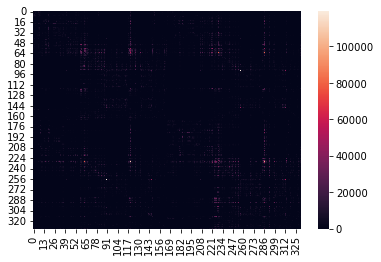

In [3]:
from graspologic.datasets import load_mice
from grakel import Graph

# Load the full mouse dataset
mice = load_mice()

# Stack all adjacency matrices in a 3D numpy array
graphs = np.array(mice.graphs)
print(graphs.shape)

print(graphs[0])
sns.heatmap(graphs[0])

# Convert adjacency matrices to grakel objects
Gs = []
for graph in graphs:
    test = Graph(initialization_object = graph, node_labels=np.arange(0, 332))
    Gs.append(test)

print(len(Gs))

In [4]:
print(Gs[1].index_node_labels)
#print(Gs[0].get_labels(purpose="adjacency"))


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

0.6602917694875889


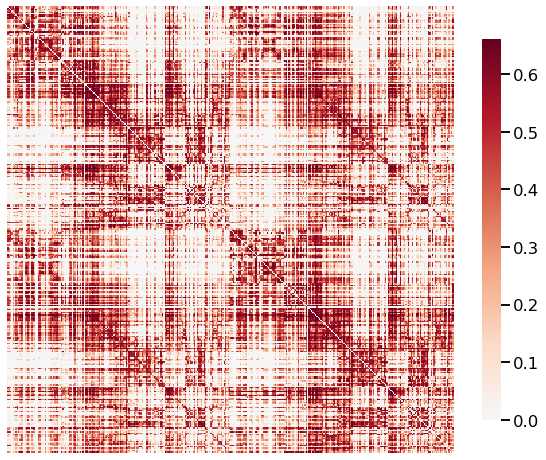

In [64]:
from graspologic.plot import heatmap
import matplotlib.pyplot as plt
ax = heatmap(graphs[0], context="talk", transform="simple-all")
ax.figure.set_facecolor('w')

print(np.count_nonzero(graphs[0])/graphs[0].size)


## Calculate Kernel Matrices

We will look at the Random Walk Kernel, Shortest Path Kernel, and the Multiscale Laplacian Kernel.

### Random Walk Kernel
Quantifies similiarity based on the number of common walks between graphs.

In [67]:
from grakel.kernels import RandomWalk

kernel = RandomWalk()
Ks = kernel.fit_transform(Gs)

print(Ks.shape)

(32, 32)


In [21]:
from grakel.kernels import RandomWalk

kernel = RandomWalk()
k = kernel.pairwise_operation(Gs[0].adjacency_matrix, Gs[2].adjacency_matrix)
print(k)

-0.0008656163068823838


In [28]:
diags = kernel.diagonal()
print(diags)

[ 0.21532043  0.06171051 -0.00565717 -0.13675859 -0.06408148]


In [35]:
kernel = RandomWalk(lamda= 0.001)
kernel.initialize()
K = kernel.fit_transform([Gs[0], Gs[1], Gs[2], Gs[3], Gs[4], Gs[5]])
print(K)

[[ 0.21532043  0.45186852 -0.08654735 -0.27355467  0.08637493  0.21076882]
 [ 0.45186852  0.06171051  0.85338168 -0.16715328  0.04169041  0.12150894]
 [-0.08654735  0.85338168 -0.00565717 -0.18874672 -0.03343176 -0.27514547]
 [-0.27355467 -0.16715328 -0.18874672 -0.13675859 -0.23487768  1.32563873]
 [ 0.08637493  0.04169041 -0.03343176 -0.23487768 -0.06408148  0.08014589]
 [ 0.21076882  0.12150894 -0.27514547  1.32563873  0.08014589 -0.05217357]]


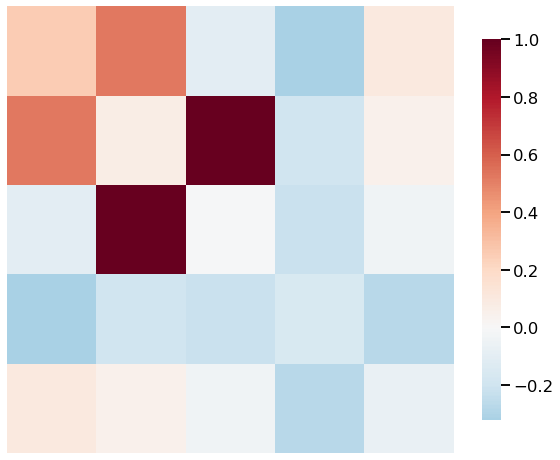

In [29]:
from graspologic.plot import heatmap
scaled_dissimilarity = K / np.max(K)

_ = heatmap(scaled_dissimilarity, context="talk")

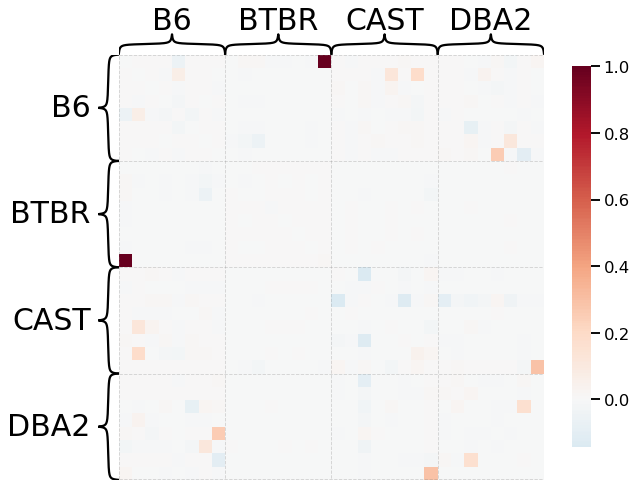

In [69]:
from graspologic.plot import heatmap
scaled_dissimilarity = Ks / np.max(Ks)

_ = heatmap(scaled_dissimilarity, context="talk", inner_hier_labels=mice.labels)

### match nodes before?

In [70]:
from grakel.kernels import RandomWalkLabeled

kernel = RandomWalkLabeled()
Ks = kernel.fit_transform(Gs)

print(Ks.shape)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Shortest Path Kernel

In [31]:
from grakel.kernels import ShortestPath

kernel = ShortestPath(with_labels=False)
Ks = kernel.fit_transform(Gs)

print(Ks.shape)

(32, 32)


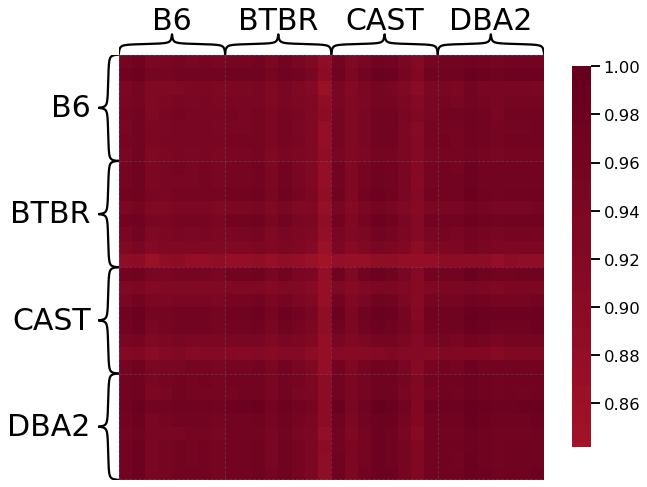

In [32]:
from graspologic.plot import heatmap
scaled_dissimilarity = Ks / np.max(Ks)

ax = heatmap(scaled_dissimilarity, context="talk", inner_hier_labels=mice.labels)
ax.figure.set_facecolor('w')

### Multiscale Laplacian Kernel

In [55]:
from grakel.kernels import MultiscaleLaplacian

kernel = MultiscaleLaplacian()
Ks = kernel.fit_transform(Gs)

print(Ks.shape)

ValueError: Graph does not have any labels for vertices.

### From Ben's NDS class [Network Data Science](https://bdpedigo.github.io/networks-course/multiple_embedding.html#representations-for-each-network)

In [45]:
from graspologic.embed import OmnibusEmbed

# Embed using Omni
embedder = OmnibusEmbed(n_elbows=3)
omni_embedding = embedder.fit_transform(graphs)
print(omni_embedding.shape)

(32, 332, 9)


In [46]:
# Create dissimilarity matrix
dissimilarity_matrix = np.zeros((len(graphs), len(graphs)))

for i, embedding1 in enumerate(omni_embedding):
    for j, embedding2 in enumerate(omni_embedding):
        dist = np.linalg.norm(embedding1 - embedding2, ord="fro")
        dissimilarity_matrix[i, j] = dist

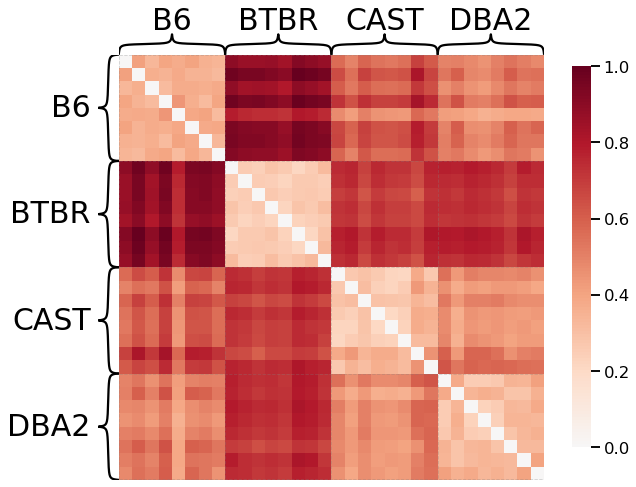

In [48]:
from graspologic.plot import heatmap
scaled_dissimilarity = dissimilarity_matrix / np.max(dissimilarity_matrix)

_ = heatmap(scaled_dissimilarity, context="talk", inner_hier_labels=mice.labels)